## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/ECC 데과B/final.csv')

In [5]:
data.head()

,Unnamed: 0,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
0,0,군위,2021-09-01,61.1076,2902435.2,2394057.6,38444000.0,78.9,40100000.0,90.8,21.9,2.4,0.2
1,1,군위,2021-09-02,0.2366,1394668.8,4237228.8,35601000.0,73.1,40100000.0,77.1,21.8,2.5,0.9
2,2,군위,2021-09-03,0.0000,207532.8,2620512.0,33188000.0,68.2,40100000.0,86.5,20.5,1.4,0.7
3,3,군위,2021-09-04,0.0000,229478.4,121564.8,33296000.0,68.4,40100000.0,66.4,22.4,2.0,7.7
4,4,군위,2021-09-05,0.0000,128908.8,128908.8,33296000.0,68.4,40100000.0,68.5,21.8,1.7,1.0


In [6]:
# 인덱스 행 제거

data.drop('Unnamed: 0', axis = 1, inplace = True)

In [7]:
# 행 제거되었는지 확인

data.tail()

,dam_nm,obsr_de,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
30676,횡성,2020-08-27,7.2651,557107.2,1364342.4,64670000.0,74.4,73400000.0,80.8,27.4,2.0,3.6
30677,횡성,2020-08-28,59.3119,733104.0,380764.8,65022000.0,74.8,73400000.0,85.9,27.0,1.1,3.7
30678,횡성,2020-08-29,24.2231,3824755.2,1530144.0,67317000.0,77.5,73400000.0,88.4,25.8,0.6,1.3
30679,횡성,2020-08-30,39.7127,3964377.6,2511561.6,68770000.0,79.1,73400000.0,90.3,25.1,0.8,1.7
30680,횡성,2020-08-31,0.0000,3438115.2,4993920.0,67214000.0,77.4,73400000.0,79.6,24.6,1.1,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30681 entries, 0 to 30680
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dam_nm      30681 non-null  object 
 1   obsr_de     30681 non-null  object 
 2   rain_qy     30681 non-null  float64
 3   inflow_qy   30681 non-null  float64
 4   outflow_qy  30681 non-null  float64
 5   reserve_qy  30681 non-null  float64
 6   reserve_rt  30681 non-null  float64
 7   valid_qy    30681 non-null  float64
 8   avg_hmd     30681 non-null  float64
 9   avg_tmr     30681 non-null  float64
 10  avg_wv      30681 non-null  float64
 11  sun_sum     30681 non-null  float64
dtypes: float64(10), object(2)
memory usage: 2.8+ MB


In [9]:
data.describe()

,rain_qy,inflow_qy,outflow_qy,reserve_qy,reserve_rt,valid_qy,avg_hmd,avg_tmr,avg_wv,sun_sum
count,30681.000000,3.068100e+04,3.068100e+04,3.068100e+04,30681.000000,3.068100e+04,30681.000000,30681.000000,30681.000000,30681.000000
mean,3.542968,2.098515e+06,2.174761e+06,3.627624e+08,57.301970,4.366905e+08,68.671781,13.109908,1.567154,8.731742
std,12.517330,1.123420e+07,9.133807e+06,4.937190e+08,16.767103,5.300645e+08,15.216576,9.891448,0.979103,6.221841
min,0.000000,0.000000e+00,0.000000e+00,3.000000e+03,0.000000,1.788000e+07,0.800000,-16.000000,0.020000,0.080000
25%,0.000000,4.052160e+04,1.378944e+05,3.934500e+07,46.400000,6.980000e+07,58.400000,5.100000,0.900000,5.000000
50%,0.000000,2.485728e+05,5.885568e+05,1.351010e+08,58.400000,2.100000e+08,70.600000,13.300000,1.300000,8.200000
75%,0.491400,1.110758e+06,1.614211e+06,4.669560e+08,69.200000,5.600000e+08,80.000000,21.600000,1.900000,11.100000
max,334.630500,4.715675e+08,4.343860e+08,2.416721e+09,98.900000,1.900000e+09,100.000000,94.200000,10.000000,446.000000


## 이상치 처리

In [10]:
# 이상치 식별을 위한 IQR 계산
Q1 = data[['avg_tmr', 'sun_sum']].quantile(0.25)
Q3 = data[['avg_tmr', 'sun_sum']].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 식별
outliers = ((data[['avg_tmr', 'sun_sum']] < lower_bound) | (data[['avg_tmr', 'sun_sum']] > upper_bound))


In [11]:
# 이상치가 없는 행만 선택
data_no_outliers = data[~outliers.any(axis=1)]

# 결과 출력
print("Original DataFrame shape:", data.shape)
print("DataFrame shape after removing outliers:", data_no_outliers.shape)

Original DataFrame shape: (30681, 12)
DataFrame shape after removing outliers: (29313, 12)


## 기초 통계 및 시각화

In [12]:
# 'avg_tmr'과 'sun_sum' 변수의 기초 통계량 계산
stats = data[['avg_tmr', 'sun_sum']].describe()

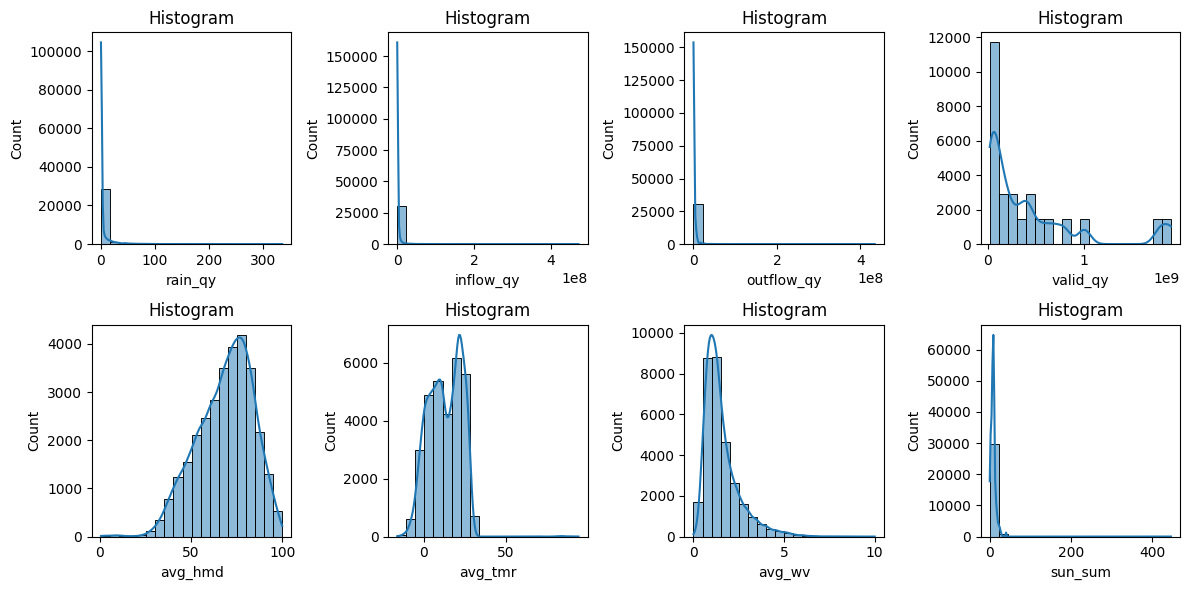

In [13]:
# 히스토그램 그리기
var = ['rain_qy', 'inflow_qy', 'outflow_qy', 'valid_qy', 'avg_hmd', 'avg_tmr', 'avg_wv', 'sun_sum']
plt.figure(figsize=(12, 6))

for j, v in enumerate(var):
  plt.subplot(2, 4, j+1)
  sns.histplot(data[v], bins=20, kde=True)
  plt.title('Histogram')

plt.tight_layout()
plt.show()

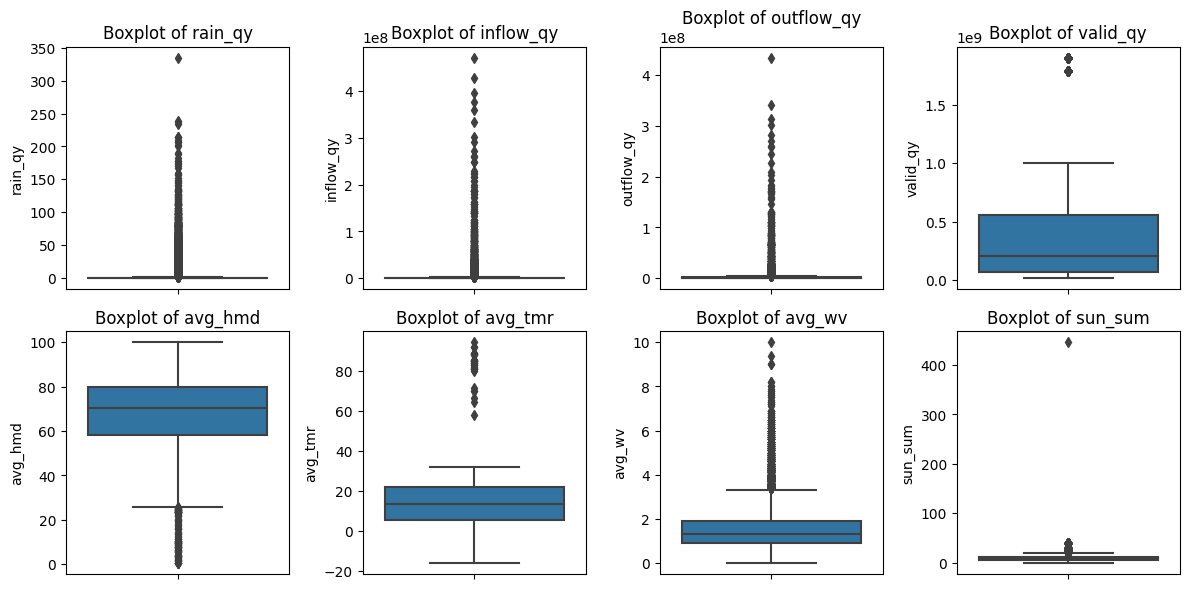

In [14]:
# 상자 그림 그리기
plt.figure(figsize=(12, 6))
for j, v in enumerate(var):
    plt.subplot(2, 4, j + 1)
    sns.boxplot(data=data, y=v)
    plt.title('Boxplot of ' + v)

plt.tight_layout()
plt.show()


In [15]:
# 기초 통계량 출력
stats = data[var].describe()
print("Basic Statistics:")
print(stats)

Basic Statistics:
            rain_qy     inflow_qy    outflow_qy      valid_qy       avg_hmd  \
count  30681.000000  3.068100e+04  3.068100e+04  3.068100e+04  30681.000000   
mean       3.542968  2.098515e+06  2.174761e+06  4.366905e+08     68.671781   
std       12.517330  1.123420e+07  9.133807e+06  5.300645e+08     15.216576   
min        0.000000  0.000000e+00  0.000000e+00  1.788000e+07      0.800000   
25%        0.000000  4.052160e+04  1.378944e+05  6.980000e+07     58.400000   
50%        0.000000  2.485728e+05  5.885568e+05  2.100000e+08     70.600000   
75%        0.491400  1.110758e+06  1.614211e+06  5.600000e+08     80.000000   
max      334.630500  4.715675e+08  4.343860e+08  1.900000e+09    100.000000   

            avg_tmr        avg_wv       sun_sum  
count  30681.000000  30681.000000  30681.000000  
mean      13.109908      1.567154      8.731742  
std        9.891448      0.979103      6.221841  
min      -16.000000      0.020000      0.080000  
25%        5.100000 

## 변수들 간의 상관 관계 분석

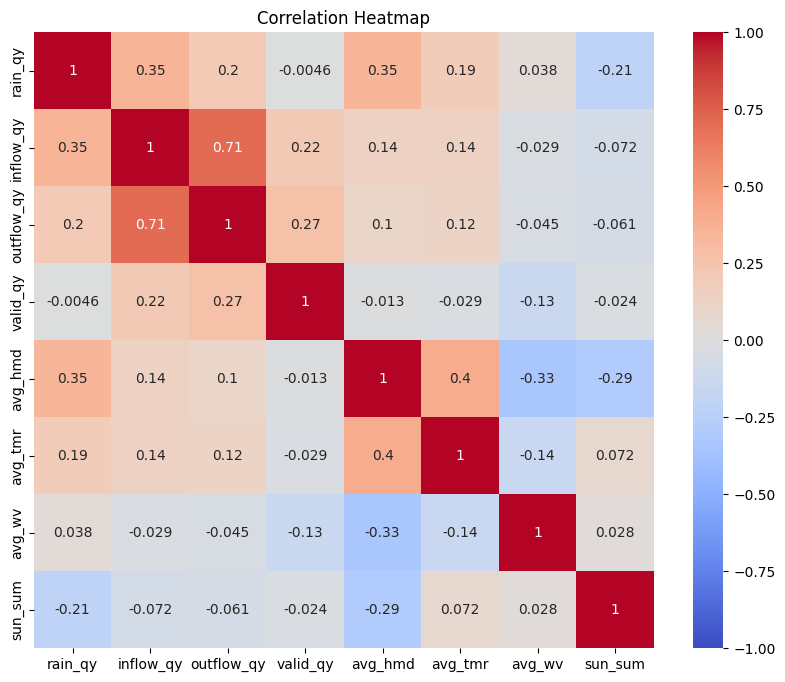

In [16]:
# 변수들 간의 상관 계수 계산
correlation_matrix = data[var].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


## 학습용, 평가용 데이터 분리

In [17]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, shuffle = True)

In [18]:
# 분리된 데이터 확인
print("Train data shape:", data_train.shape)
print("Test data shape:", data_test.shape)

Train data shape: (24544, 12)
Test data shape: (6137, 12)


## 표준화 스케일링

In [23]:
 # 파일 저장 경로 지정
 save = '/content/drive/MyDrive/ECC 데과B/data'

In [24]:
from sklearn.preprocessing import StandardScaler

# Features (독립 변수)
X_train_st = data_train[var]
X_test_st = data_test[var]

# Target (종속 변수)
y_train_st = data_train['reserve_qy']
y_test_st = data_test['reserve_qy']

# 스케일링
scaler = StandardScaler()
X_train_scaled_st = scaler.fit_transform(X_train_st)
X_test_scaled_st = scaler.transform(X_test_st)

# 스케일링된 데이터 확인
print("Scaled Train data shape:", X_train_scaled_st.shape)
print("Scaled Test data shape:", X_test_scaled_st.shape)

Scaled Train data shape: (24544, 8)
Scaled Test data shape: (6137, 8)


In [25]:
# 스케일링된 데이터를 DataFrame으로 만들기
X_train_scaled_df_st = pd.DataFrame(X_train_scaled_st, columns=var)
X_test_scaled_df_st = pd.DataFrame(X_test_scaled_st, columns=var)

# 최종 전처리된 데이터와 target 변수 결합
final_train_df_st = pd.concat([X_train_scaled_df_st, y_train_st], axis=1)
final_test_df_st = pd.concat([X_test_scaled_df_st, y_test_st], axis=1)

# CSV 파일로 저장
final_train_df_st.to_csv(save, index=False)

## 정규화 스케일링

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Features (독립 변수)
X_train_mm = data_train[var]
X_test_mm = data_test[var]

# Target (종속 변수)
y_train_mm = data_train['reserve_qy']
y_test_mm = data_test['reserve_qy']

# 스케일링
scaler = MinMaxScaler()
X_train_scaled_mm = scaler.fit_transform(X_train_mm)
X_test_scaled_mm = scaler.transform(X_test_mm)

# 스케일링된 데이터 확인
print("Scaled Train data shape:", X_train_scaled_mm.shape)
print("Scaled Test data shape:", X_test_scaled_mm.shape)

Scaled Train data shape: (24544, 8)
Scaled Test data shape: (6137, 8)


In [27]:
# 스케일링된 데이터를 DataFrame으로 만들기
X_train_scaled_df_mm = pd.DataFrame(X_train_scaled_mm, columns=var)
X_test_scaled_df_mm = pd.DataFrame(X_test_scaled_mm, columns=var)

# 최종 전처리된 데이터와 target 변수 결합
final_train_df_mm = pd.concat([X_train_scaled_df_mm, y_train_mm], axis=1)
final_test_df_mm = pd.concat([X_test_scaled_df_mm, y_test_mm], axis=1)

# CSV 파일로 저장
final_train_df_mm.to_csv(save, index=False)

## 표준정규화 스케일링

In [28]:
from sklearn.preprocessing import RobustScaler

# Features (독립 변수)
X_train_r = data_train[var]
X_test_r = data_test[var]

# Target (종속 변수)
y_train_r = data_train['reserve_qy']
y_test_r = data_test['reserve_qy']

# 스케일링
scaler = RobustScaler()
X_train_scaled_r = scaler.fit_transform(X_train_r)
X_test_scaled_r = scaler.transform(X_test_r)

# 스케일링된 데이터 확인
print("Scaled Train data shape:", X_train_scaled_r.shape)
print("Scaled Test data shape:", X_test_scaled_r.shape)

Scaled Train data shape: (24544, 8)
Scaled Test data shape: (6137, 8)


In [29]:
# 스케일링된 데이터를 DataFrame으로 만들기
X_train_scaled_df_r = pd.DataFrame(X_train_scaled_r, columns=var)
X_test_scaled_df_r = pd.DataFrame(X_test_scaled_r, columns=var)

# 최종 전처리된 데이터와 target 변수 결합
final_train_df_r = pd.concat([X_train_scaled_df_r, y_train_r], axis=1)
final_test_df_r = pd.concat([X_test_scaled_df_r, y_test_r], axis=1)

# CSV 파일로 저장
final_train_df_r.to_csv(save, index=False)